In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [25]:
root_dir = Path('..')

datasets_dir = root_dir/'datasets'

In [27]:
postdam_dataset = datasets_dir/'ISPRS_Potsdam'

# df_classes = pd.DataFrame([
#     (0, "Impervious surfaces (white)", (255, 255, 255)),
#     (1, "Buildings (blue)", (0, 0, 255),),
#     (2, "Low vegetation (cyan)", (0, 255, 255),),
#     (3, "Trees (green)", (0, 255, 0),),
#     (4, "Cars (yellow)", (255, 255, 0),),
#     (5, "Clutter (red)", (255, 0, 0),),
#     (6, "Undefined (black)", (0, 0, 0)),
# ], columns=['class_id', 'name', 'color'])
# df_classes.to_csv(postdam_dataset/'classes.csv', index=False)

df_classes = pd.read_csv(postdam_dataset/'classes.csv')
df_classes


,class_id,name,color
0,0,Impervious surfaces (white),"(255, 255, 255)"
1,1,Buildings (blue),"(0, 0, 255)"
2,2,Low vegetation (cyan),"(0, 255, 255)"
3,3,Trees (green),"(0, 255, 0)"
4,4,Cars (yellow),"(255, 255, 0)"
5,5,Clutter (red),"(255, 0, 0)"
6,6,Undefined (black),"(0, 0, 0)"


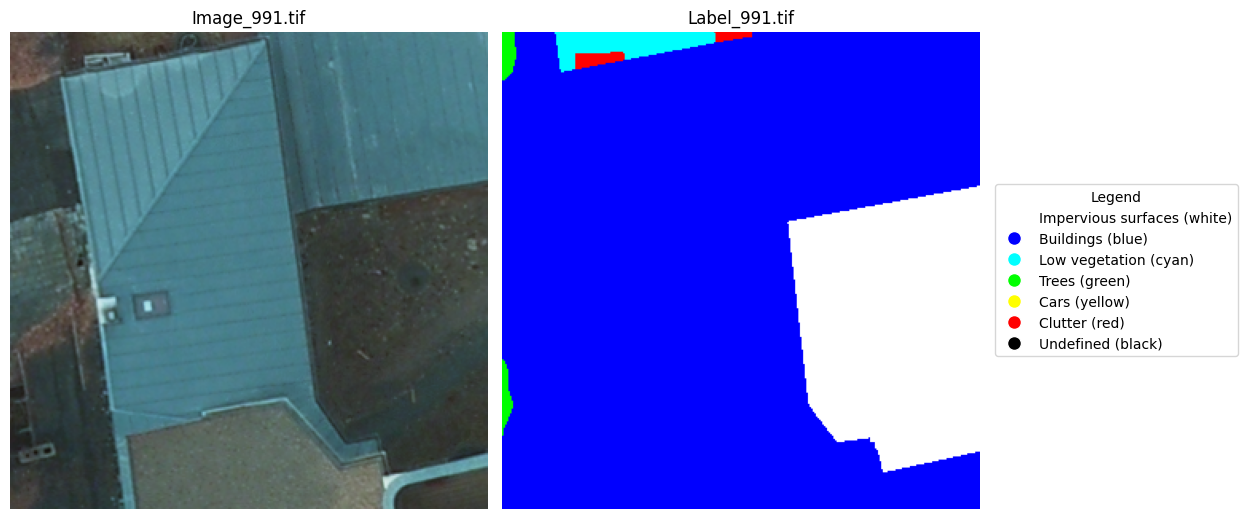

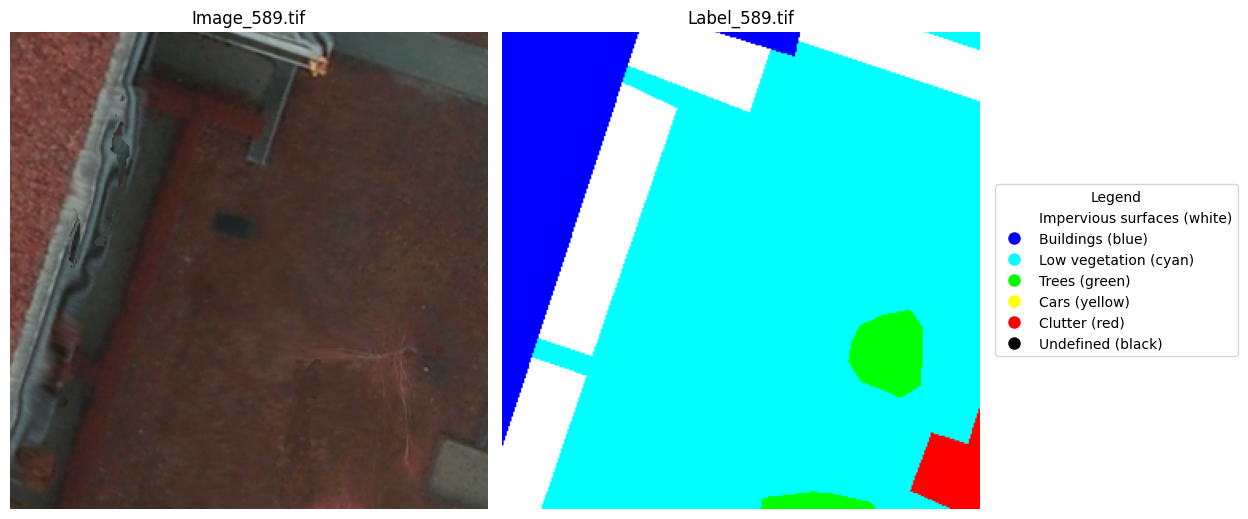

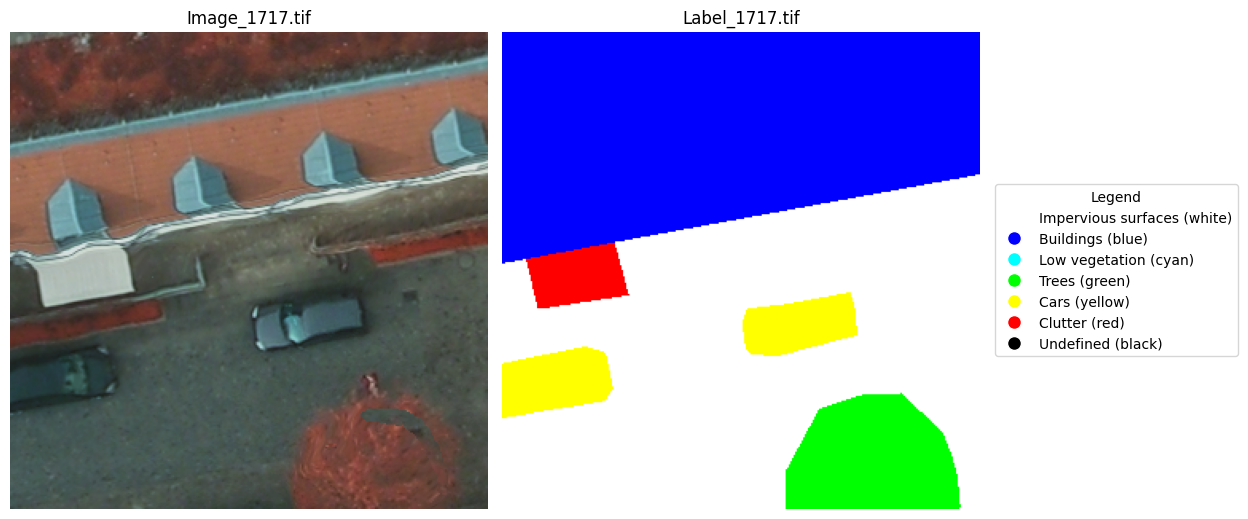

In [23]:
import os
import random

# Define the directory containing the images and labels
images_dir = "/home/m_zsuetam/.cache/kagglehub/datasets/deasadiqbal/private-data-1/versions/1/patches/Images"
labels_dir = "/home/m_zsuetam/.cache/kagglehub/datasets/deasadiqbal/private-data-1/versions/1/patches/Labels"

# List all image files in the directory
image_files = [f for f in os.listdir(images_dir) if f.endswith('.tif')]

# Randomly select three images
selected_images = random.sample(image_files, 3)

for img in selected_images:

    # Plot the selected images and their corresponding labels
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 15))

    # Load the image
    image_path = os.path.join(images_dir, img)
    image = Image.open(image_path)
    image = image.convert("RGB")  # Ensure the image is in RGB mode
    # image = np.array(image)[:, :, ::-1]  # Convert BGR to RGB by reversing the last channel
    # image = Image.fromarray(image)
    
    # Load the corresponding label
    label_path = os.path.join(labels_dir, img.replace('Image', 'Label'))
    label = Image.open(label_path)
    
    # Plot the image
    axes[0].imshow(image)
    axes[0].axis('off')
    axes[0].set_title(f"{img}")
    
    # Plot the label
    axes[1].imshow(label)
    axes[1].axis('off')
    axes[1].set_title(f"{img.replace('Image', 'Label')}")

    # Add a legend for the colors based on df_classes
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=np.array(color) / 255, markersize=10, label=name)
        for _, name, color in df_classes.itertuples(index=False)
    ]
    fig.legend(
        handles=handles, 
        loc='right', 
        ncol=1, 
        bbox_to_anchor=(1.25, 0.5), 
        title="Legend"
    )

    plt.tight_layout()
    plt.show()